In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
import os
import time

from util import *
from data_loader import * 
import scdd as sd

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/martin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_8k = load_10x_8k()
data_68k = load_10x_68k()

# testing the moment estimation

#time start: 0.0s
n_cell=8381, n_gene=138
M1, sf=1.0000
M2, sf=1.0000
M3, sf=1.0000
M4, sf=1.0000
#time total: 0.4649s



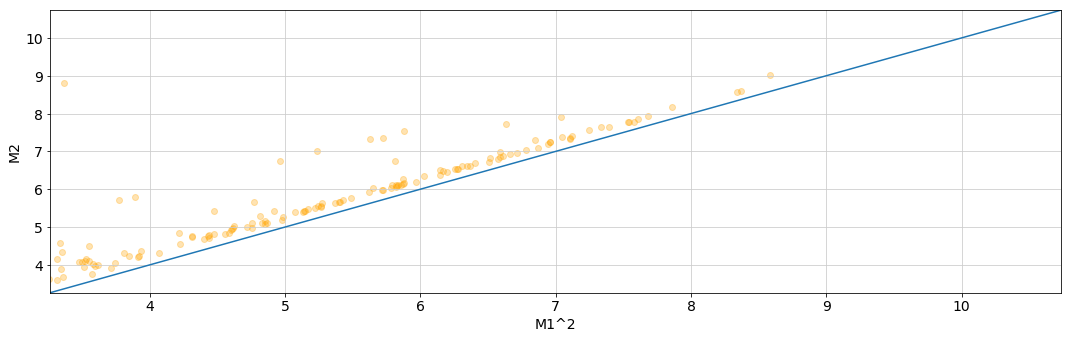

In [10]:
temp = sc.pp.filter_genes(data_8k,min_counts=5*data_8k.shape[0],copy=True)
_=sd.dd_moment_anndata(temp,k=4)

# consistency of the size factor estimation

Nr=4639
gamma_c [0.29876816 0.29912944 0.30693795 3.04127035 4.46839923 6.85162067]


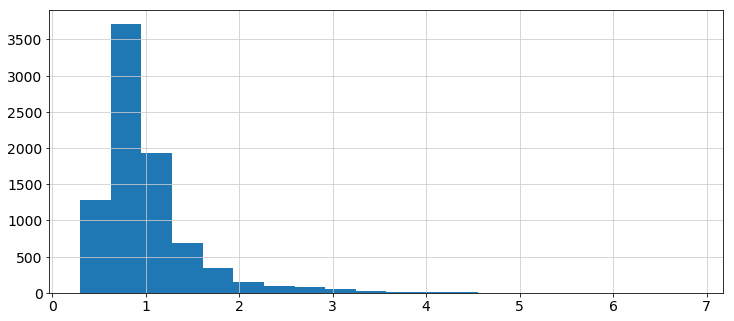

Nr=3717
gamma_c [0.16759092 0.18404711 0.26744067 2.95880017 4.28225748 6.85939121]


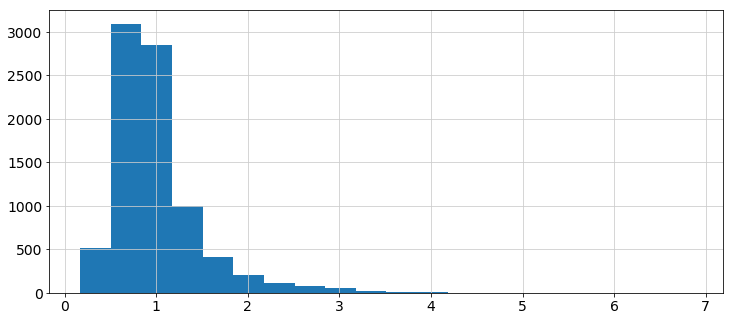

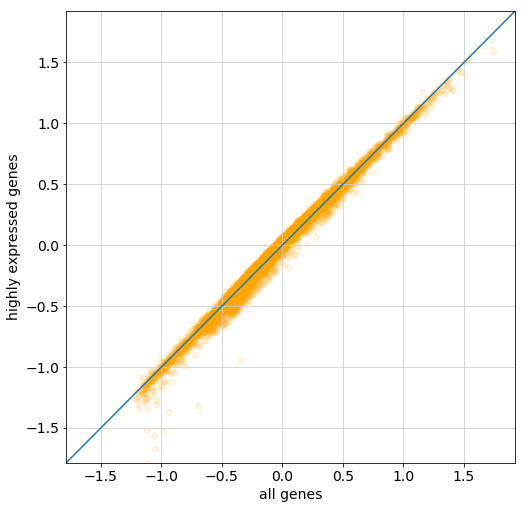

In [117]:
## consistency of the estimation of the size factor
sf1 = sd.sf(data_8k)
temp = data_8k.copy()
sc.pp.filter_genes(temp, min_counts=0.1*temp.shape[1])
sf2 = sd.sf(temp)
plt.figure(figsize=[8,8])
sd.plot_xx(np.log(sf1.clip(min=1e-4)),np.log(sf2.clip(min=1e-4)),xlabel='all genes',ylabel='highly expressed genes')
plt.show()

# estimation consistency

Nr=4639
gamma_c [0.29876816 0.29912944 0.30693795 3.04127035 4.46839923 6.85162067]


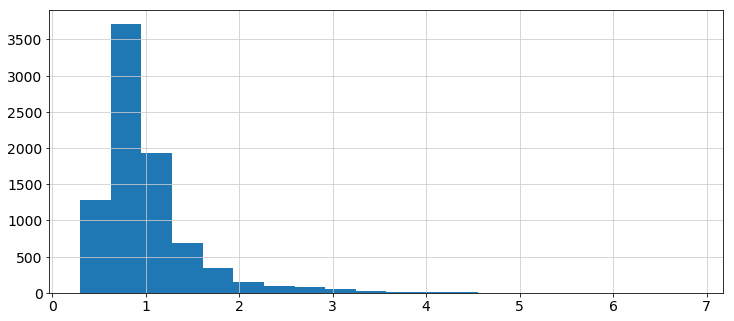

#time start: 0.0s
n_cell=8381, n_gene=12411


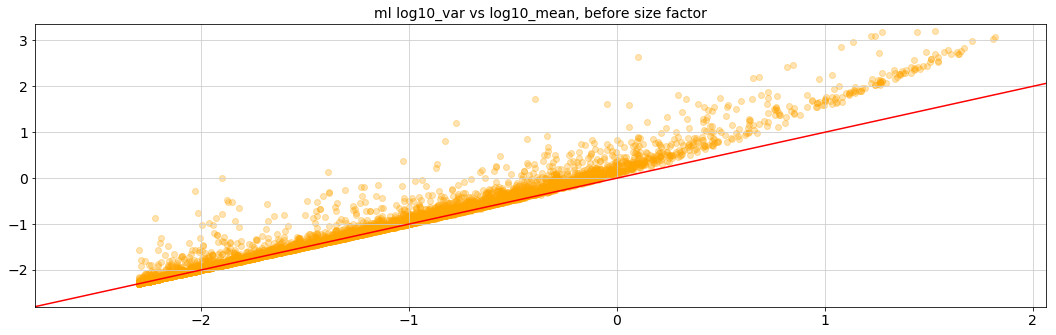

M1, sf=1.0000
M2, sf=1.2581
#time total: 0.7517s



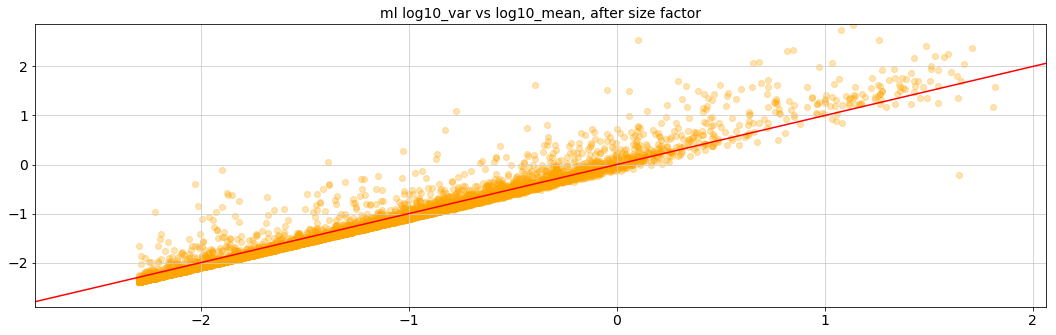

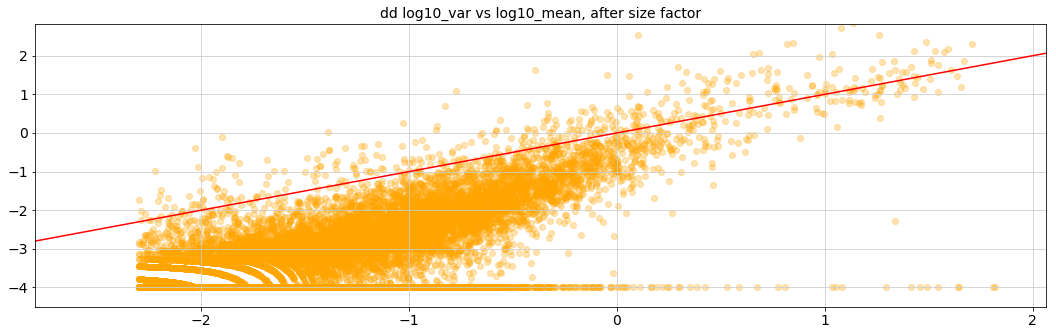

In [27]:
# 8k 
temp = data_8k.copy()
sc.pp.filter_cells(temp, min_counts=0.005*temp.shape[1])
gamma_c = sd.sf(temp,verbose=True)
sc.pp.filter_genes(temp,min_counts=0.005*temp.shape[0])
M_8k,M_ml_8k,gene_list_8k = sd.dd_moment_anndata(temp,gamma_c=gamma_c)
M_8k_nsf,M_ml_8k_nsf,gene_list_8k_nsf = sd.dd_moment_anndata(temp,gamma_c=None,verbose=False)

Nr=1369
gamma_c [0.29346663 0.29419667 0.30368686 2.44409537 3.80052586 7.67539358]


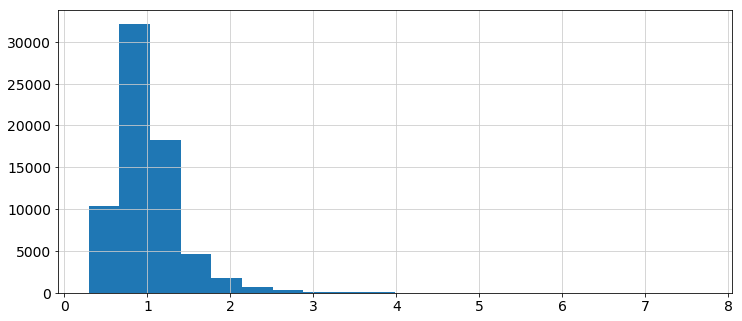

#time start: 0.0s
n_cell=68579, n_gene=8715


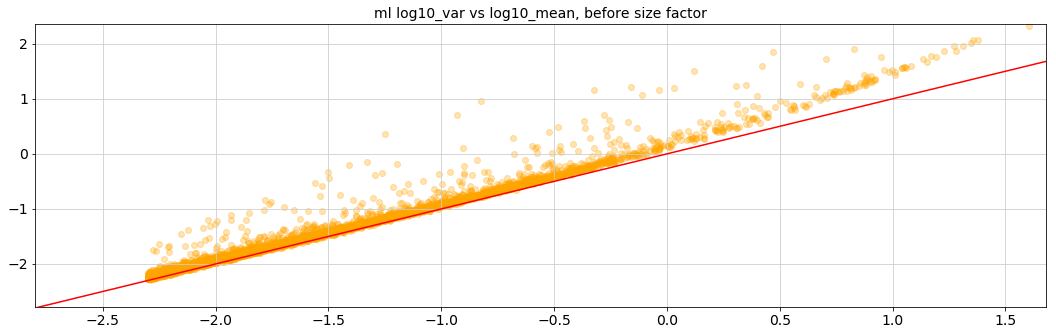

M1, sf=1.0000
M2, sf=1.1661
#time total: 1.4288s



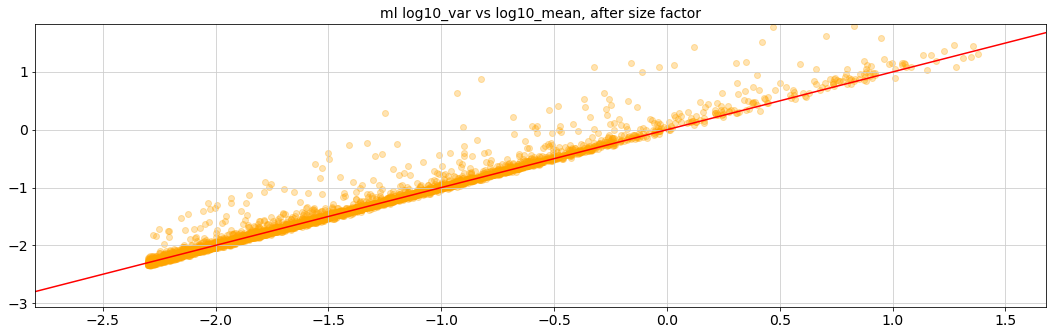

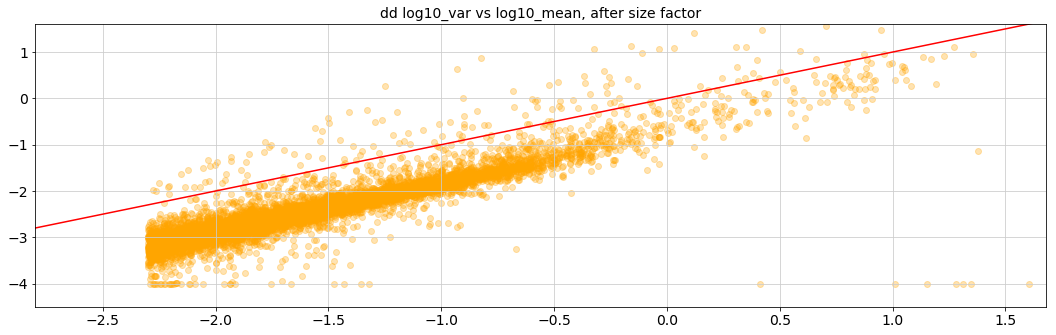

In [29]:
# 68k 
temp = data_68k.copy()
sc.pp.filter_cells(temp, min_counts=0.005*temp.shape[1])
gamma_c = sd.sf(temp,verbose=True)
sc.pp.filter_genes(temp,min_counts=0.005*temp.shape[0])
M_68k,M_ml_68k,gene_list_68k = sd.dd_moment_anndata(temp,gamma_c=gamma_c)
M_68k_nsf,M_ml_68k_nsf,gene_list_68k_nsf = sd.dd_moment_anndata(temp,gamma_c=None,verbose=False)


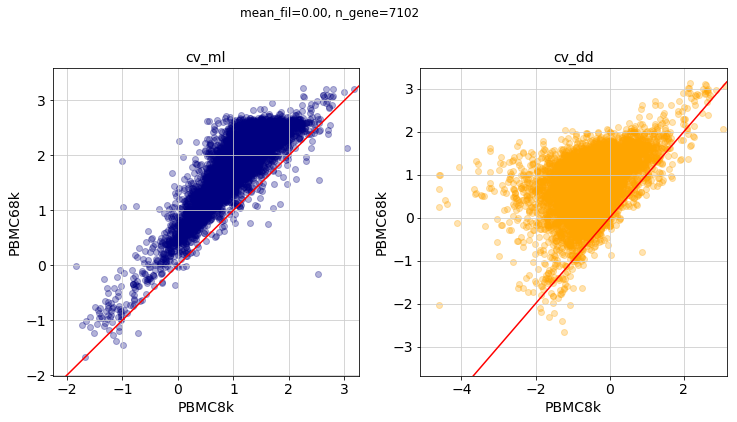

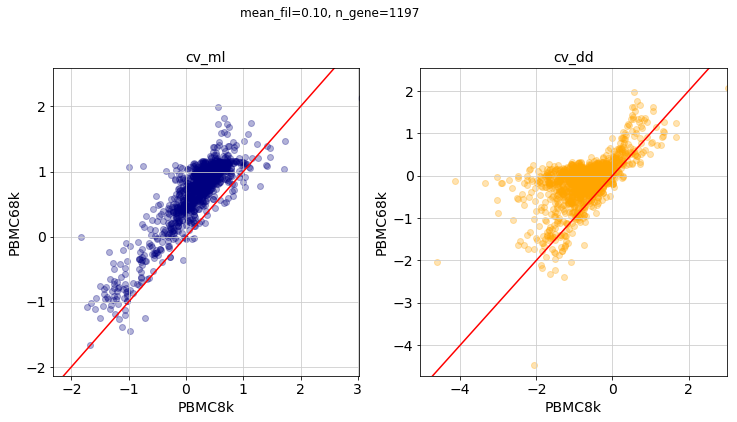

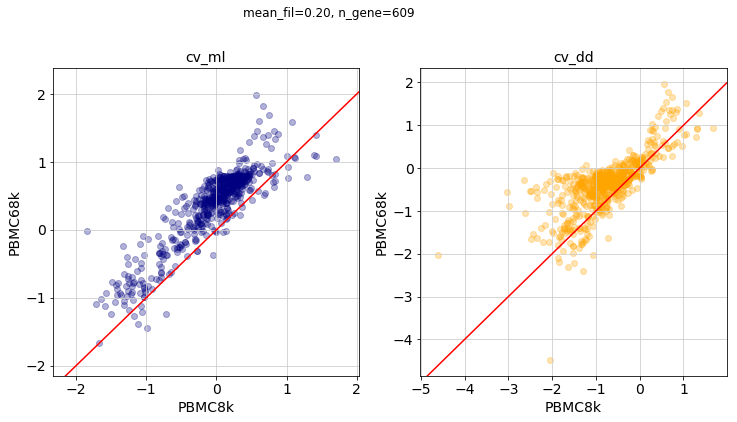

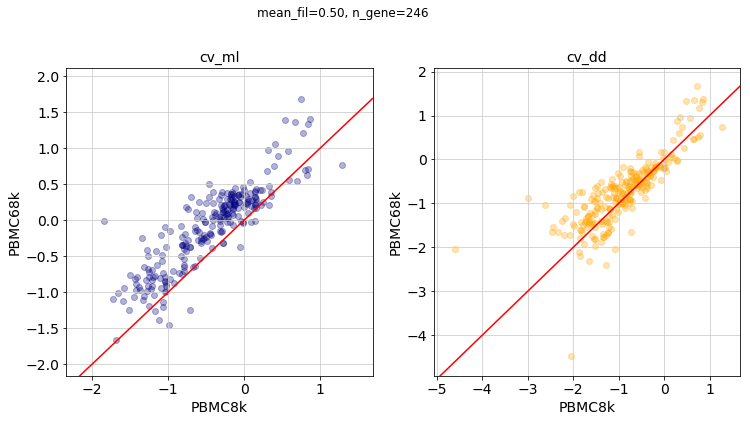

In [30]:
sd.fig_xx_cv(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0)
sd.fig_xx_cv(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.1)
sd.fig_xx_cv(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.2)
sd.fig_xx_cv(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.5)

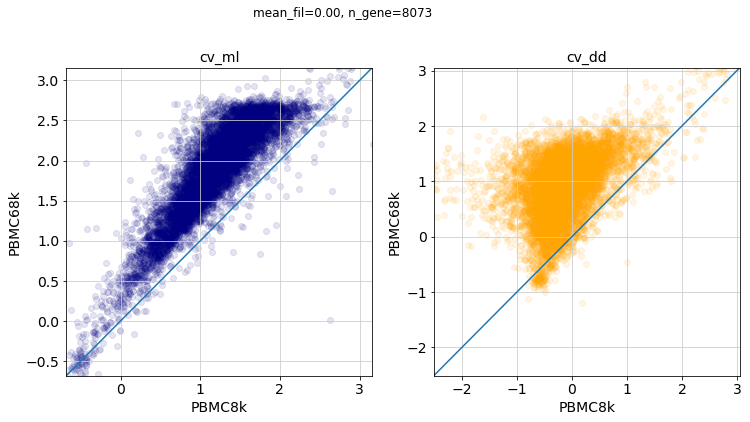

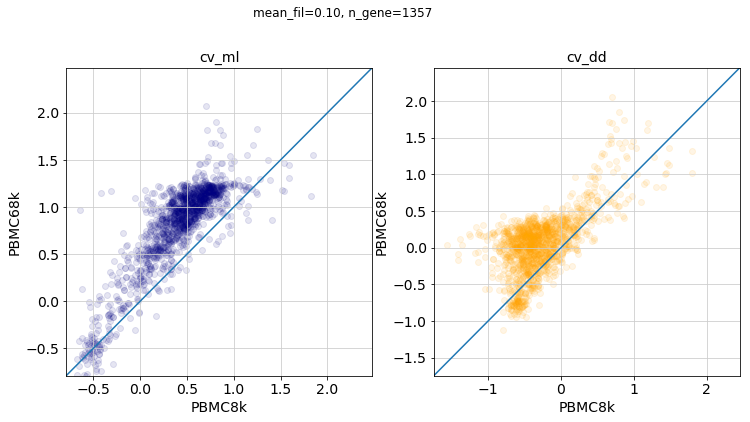

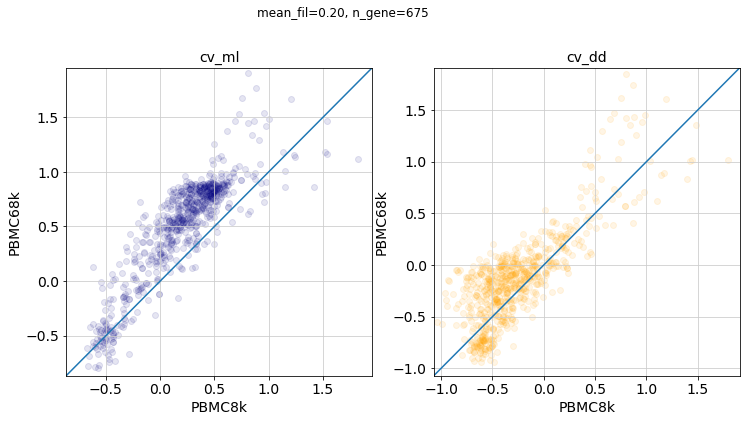

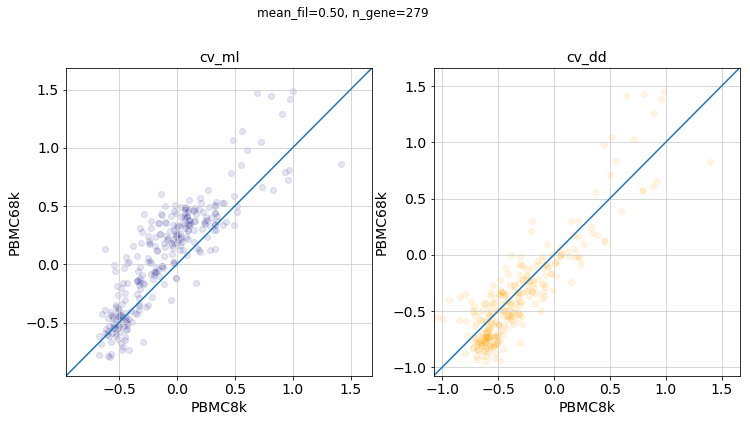

In [250]:
sd.fig_xx_cv(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=0)
sd.fig_xx_cv(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=0.1)
sd.fig_xx_cv(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=0.2)
sd.fig_xx_cv(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=0.5)

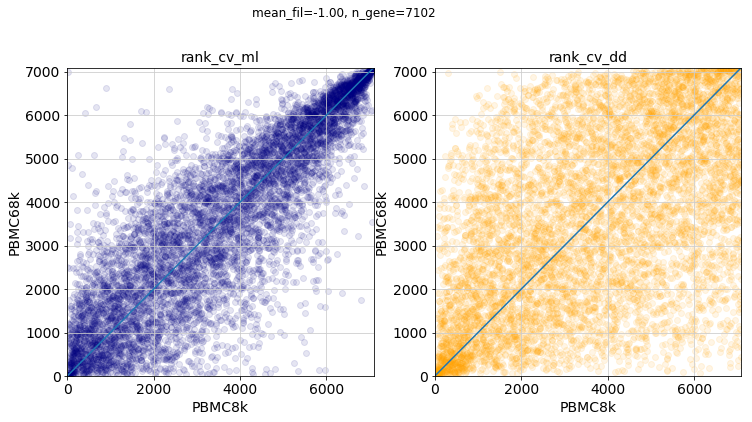

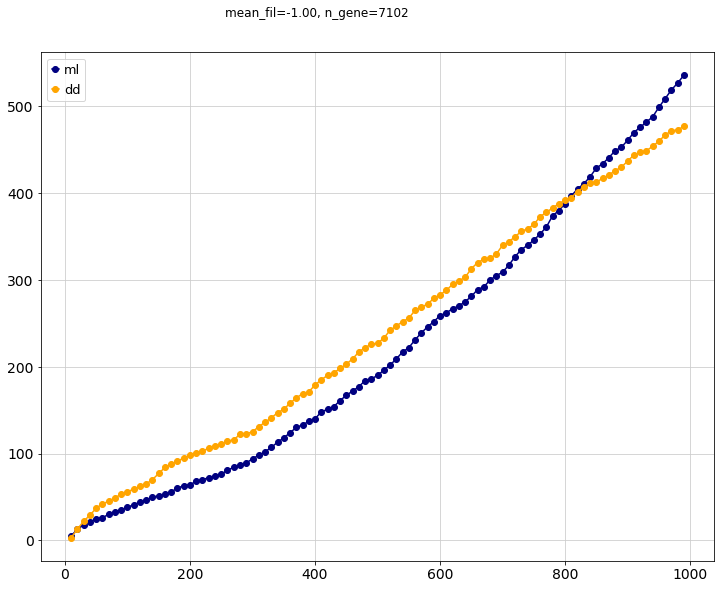

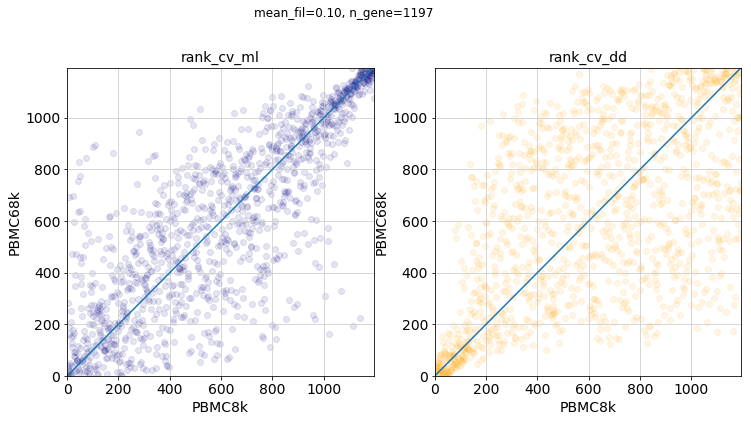

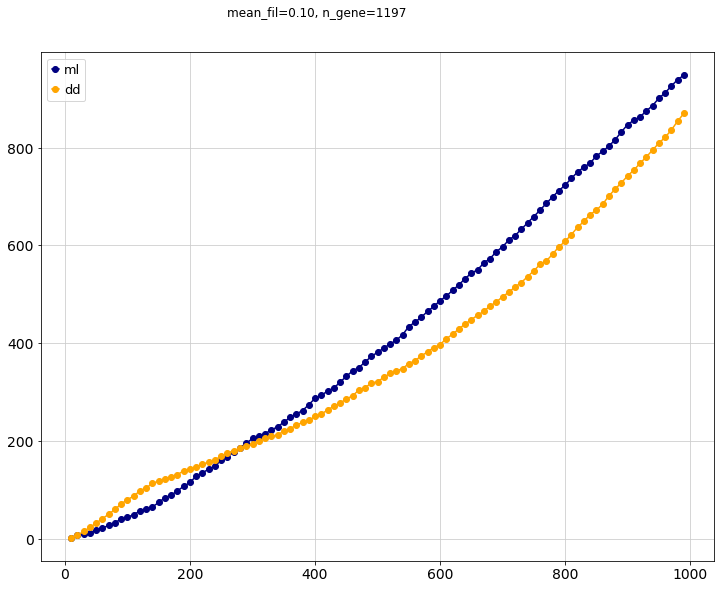

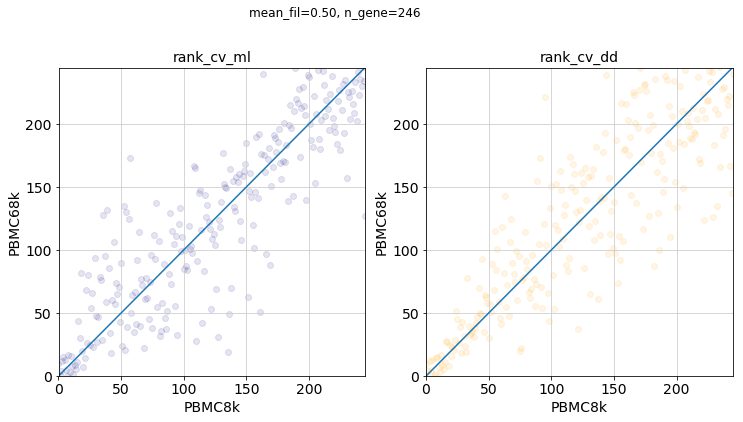

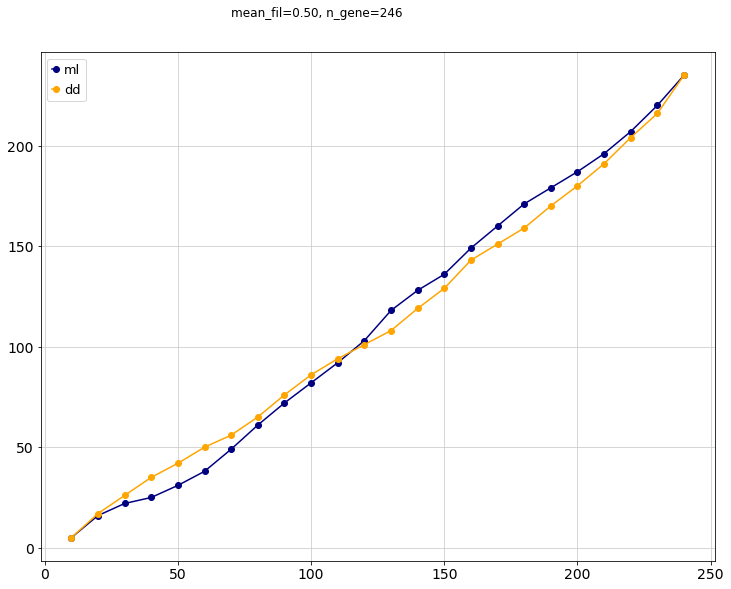

In [294]:
sd.fig_xx_rank(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=-1)
sd.fig_xx_rank(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.1)
sd.fig_xx_rank(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.5)

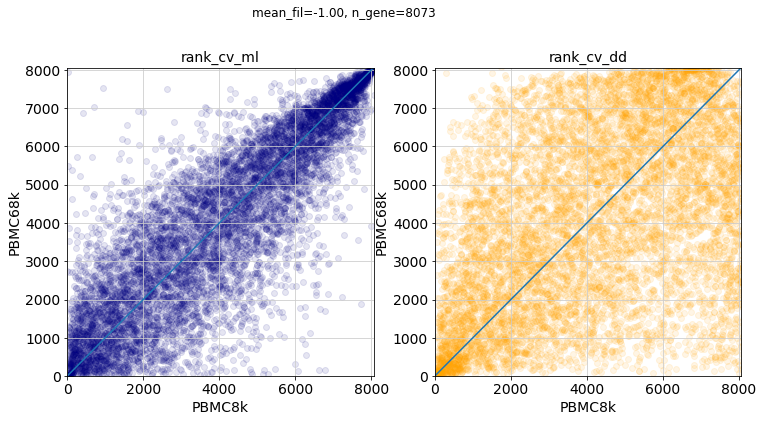

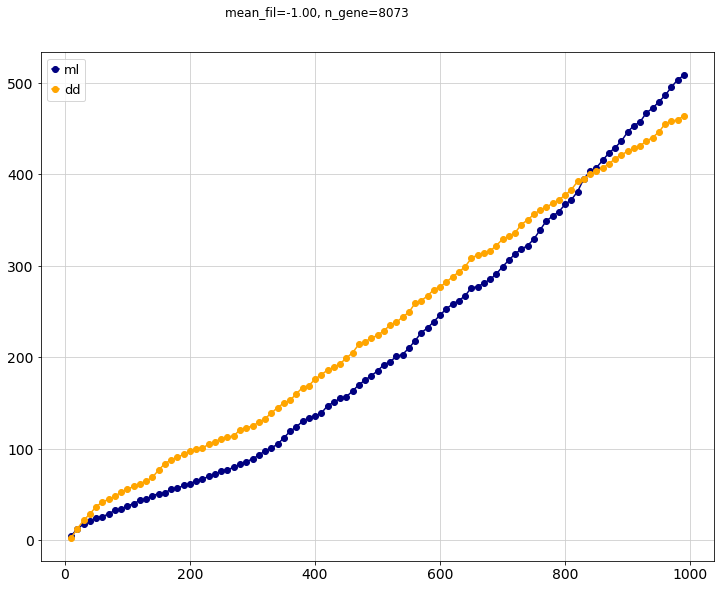

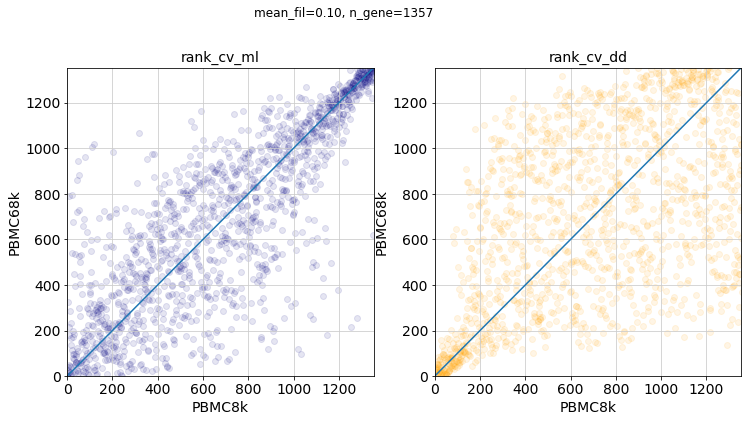

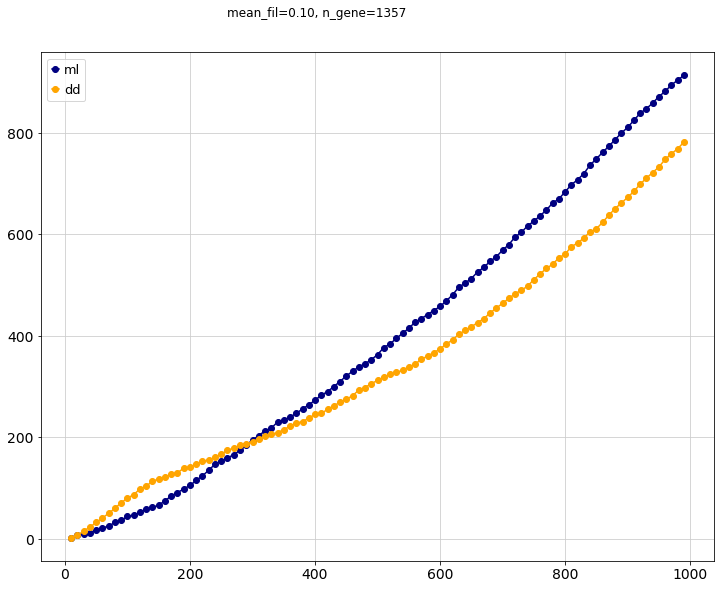

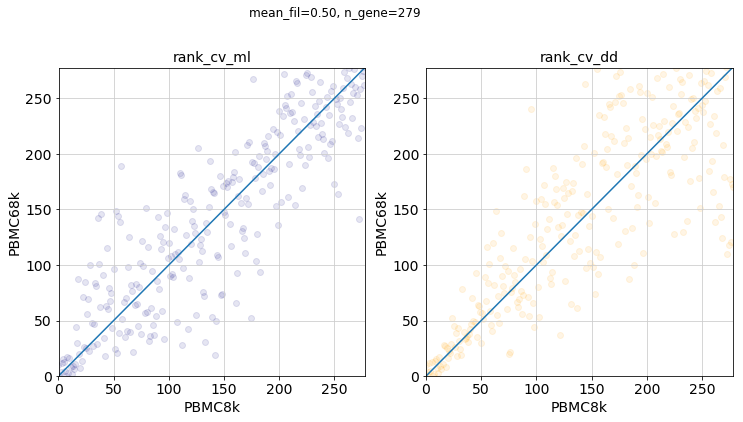

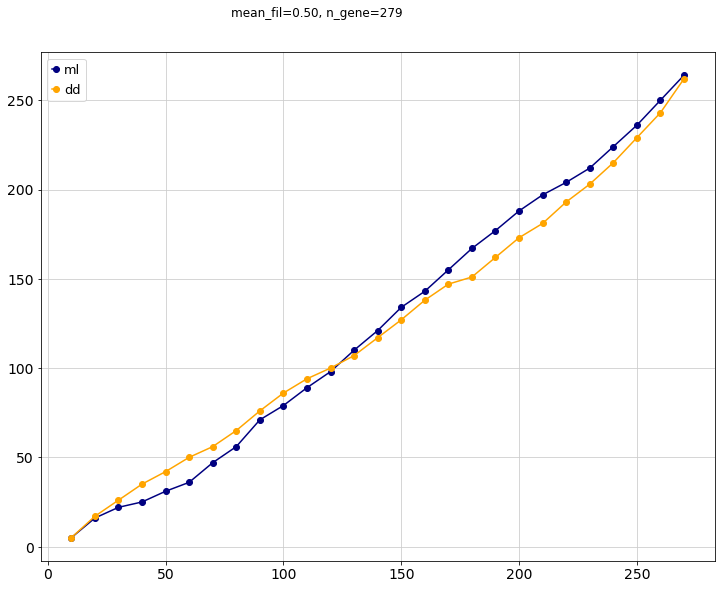

In [295]:
sd.fig_xx_rank(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=-1)
sd.fig_xx_rank(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=0.1)
sd.fig_xx_rank(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=0.5)

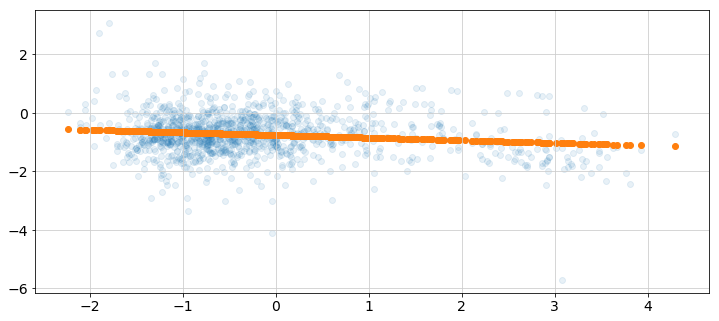

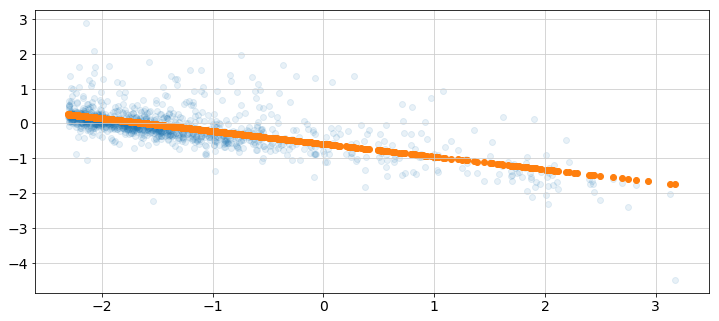

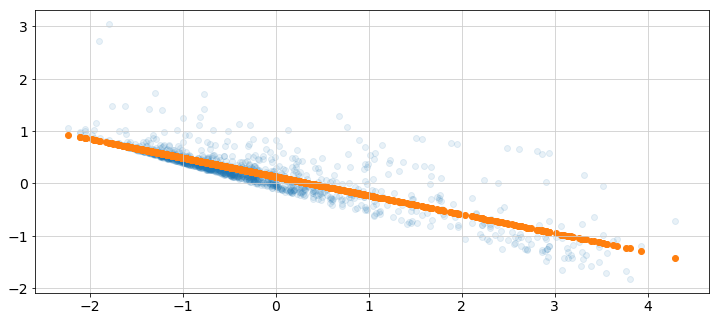

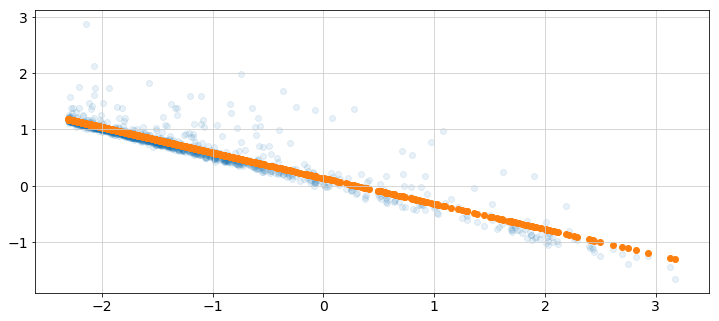

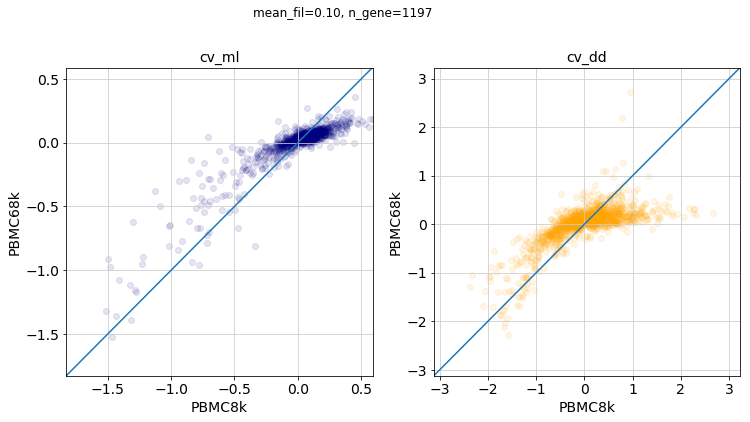

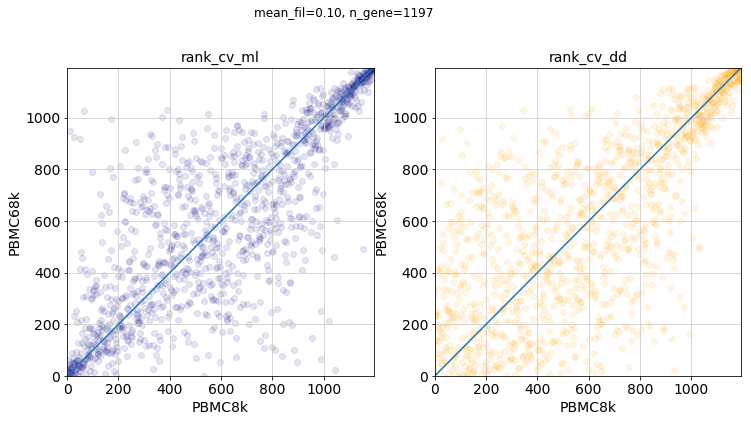

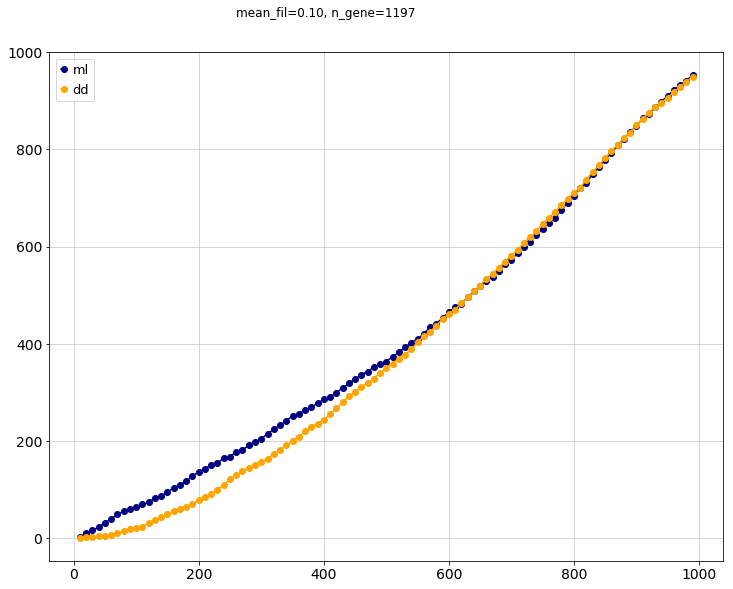

In [324]:
## some other ways of calculating the rank
sd.fig_xx_rank(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.1)

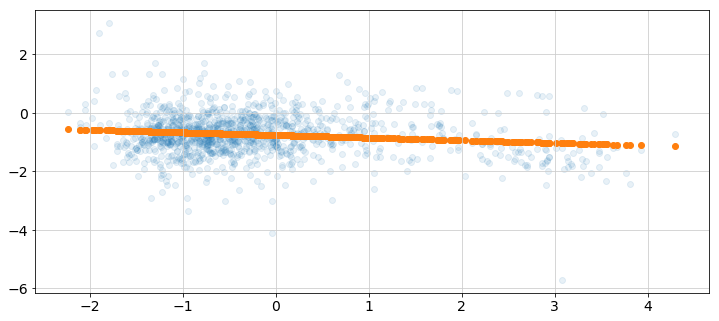

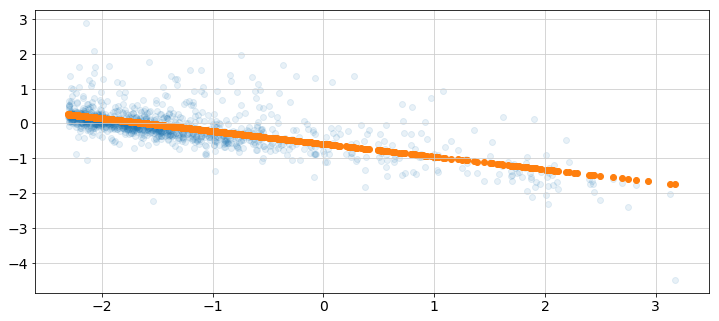

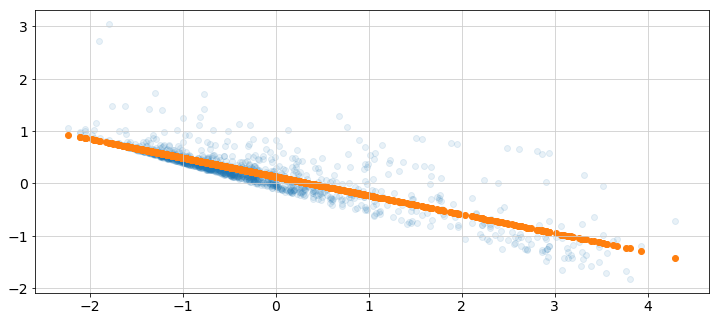

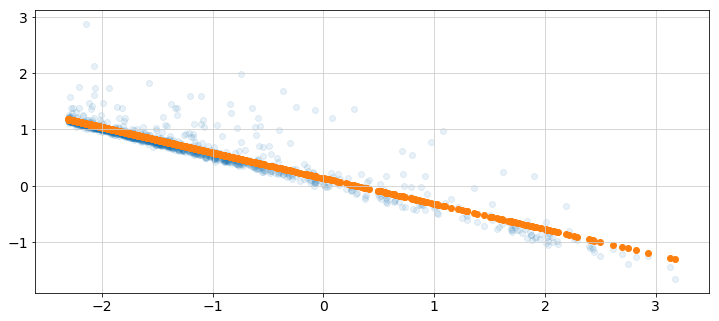

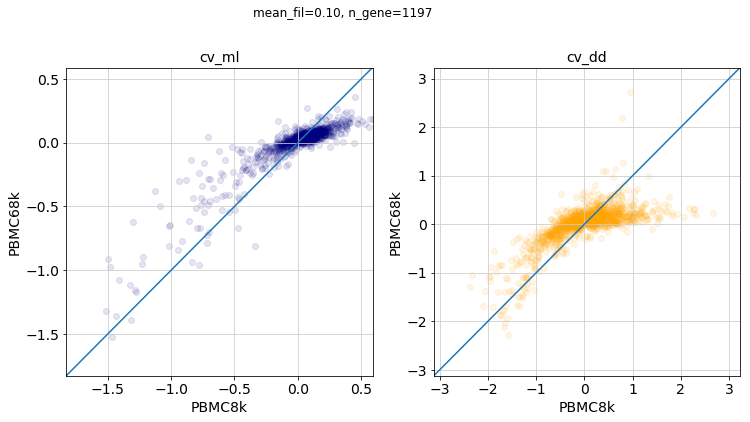

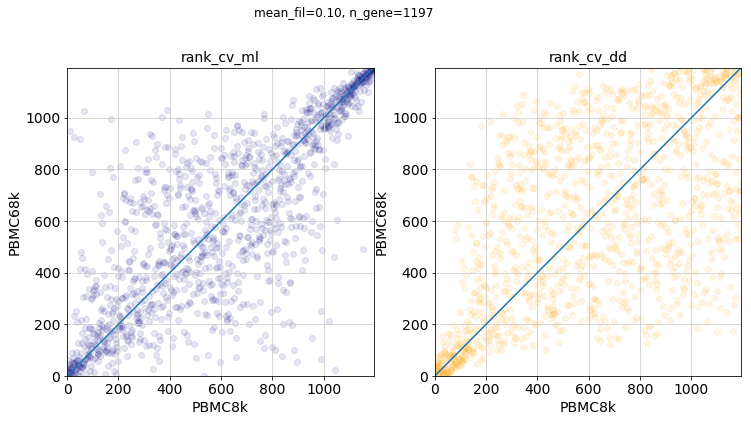

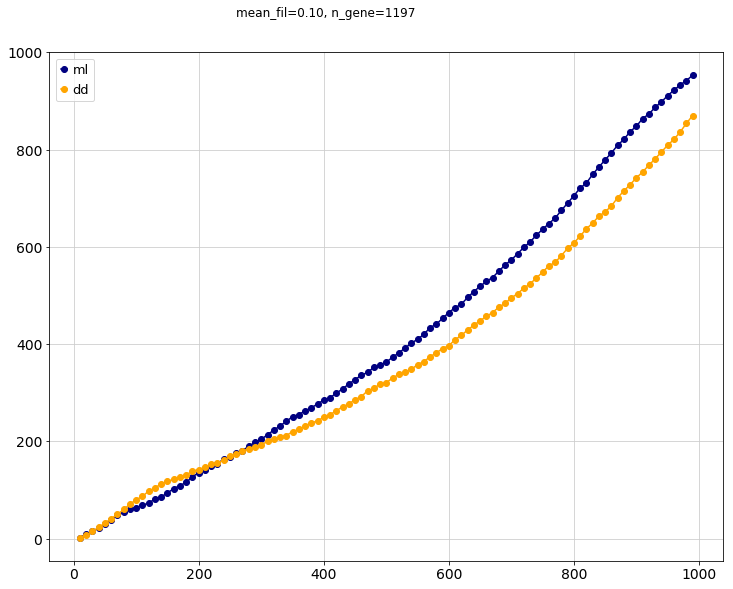

In [322]:
## some other ways of calculating the rank (dd without v_score)
sd.fig_xx_rank(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.1)

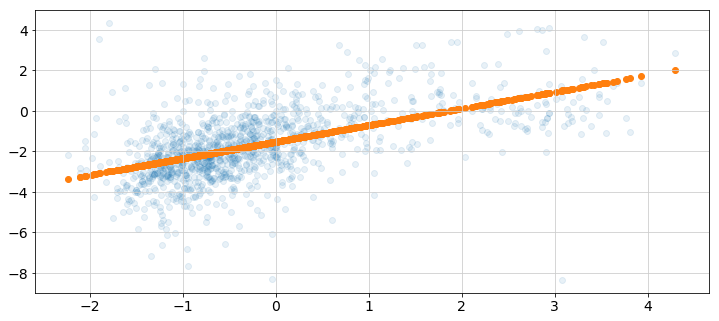

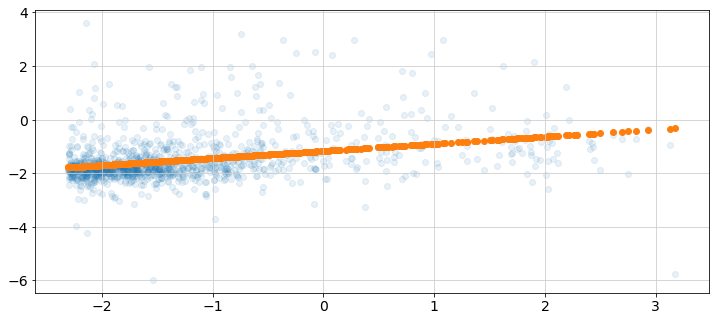

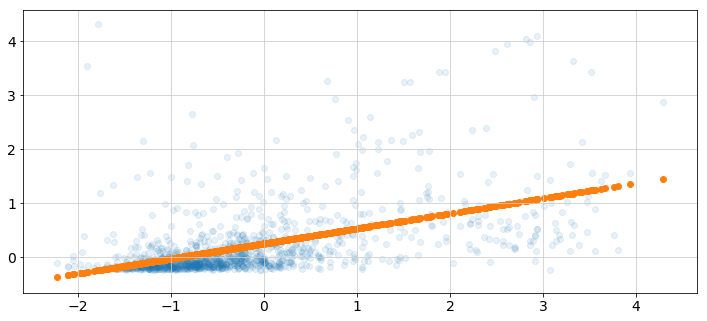

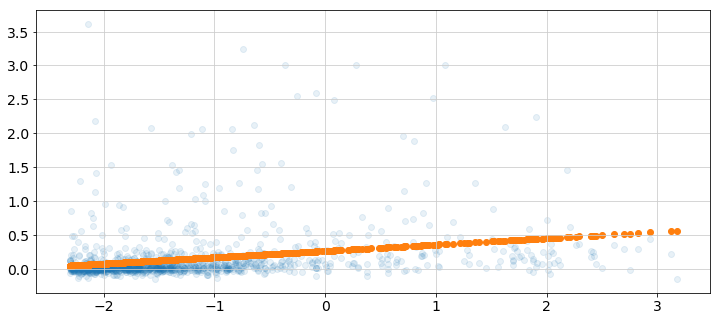

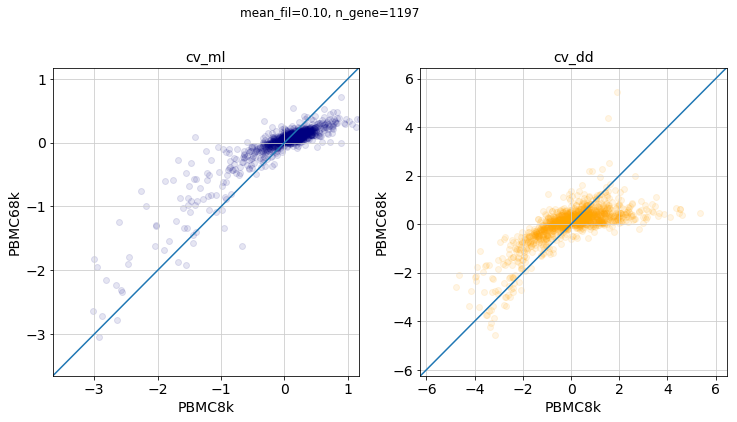

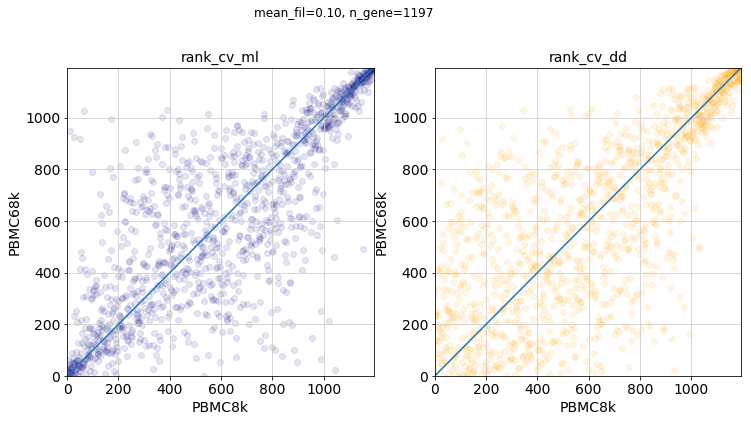

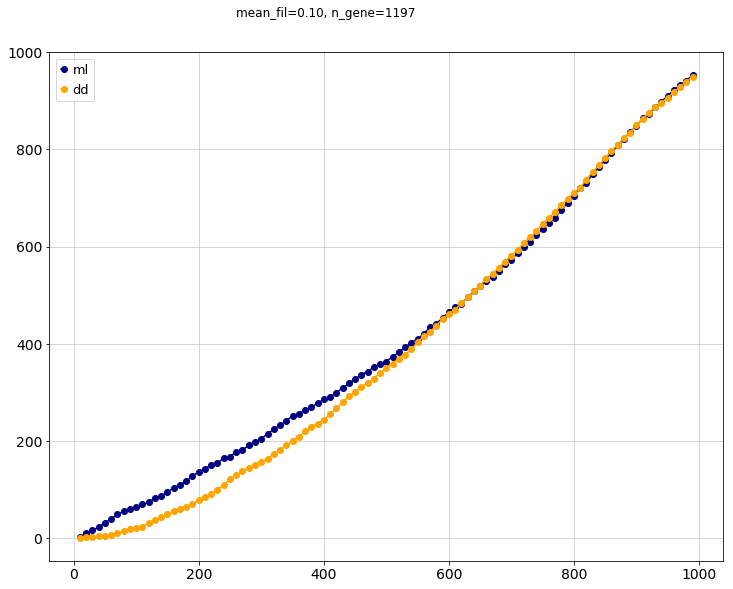

In [323]:
## some other ways of calculating the rank (fano)
sd.fig_xx_rank(M_8k,M_ml_8k,M_68k,M_ml_68k,gene_list_8k,gene_list_68k,['PBMC8k','PBMC68k'],mean_fil=0.1)

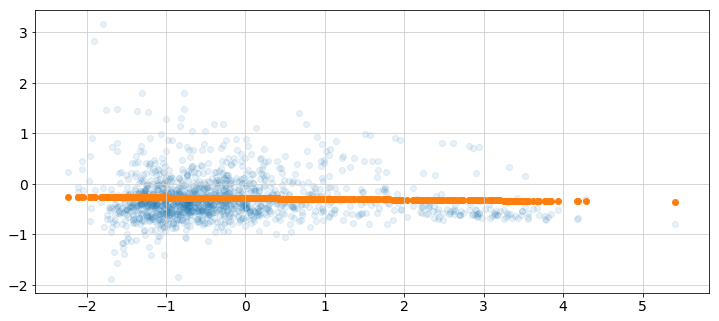

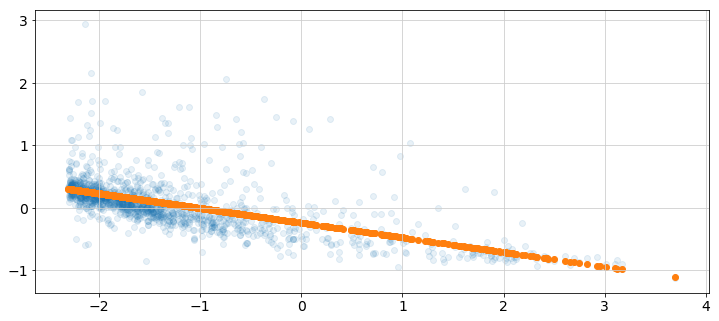

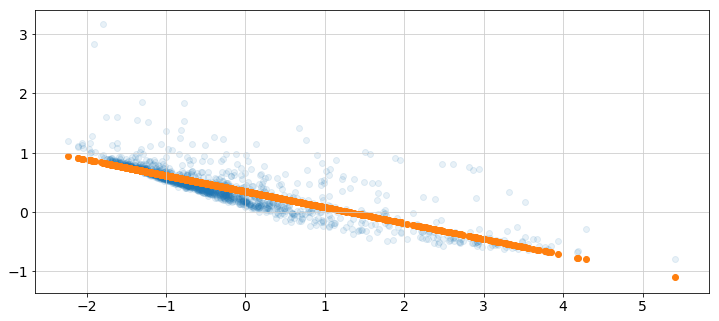

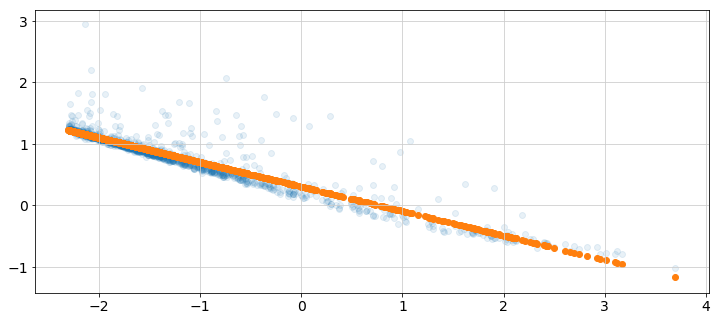

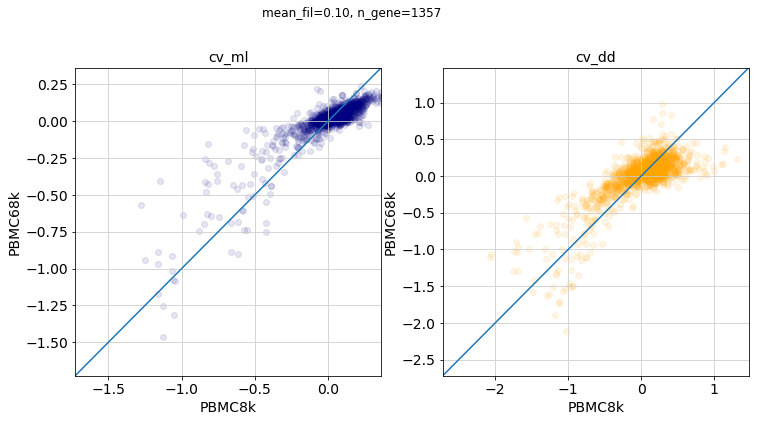

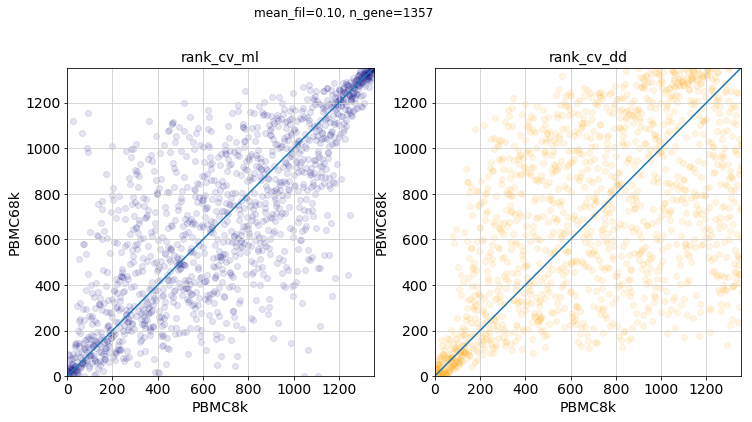

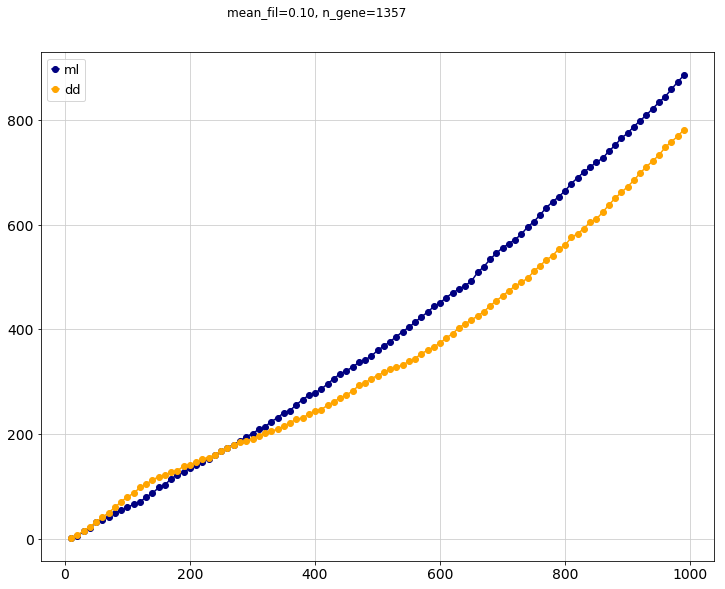

In [319]:
sd.fig_xx_rank(M_8k_nsf,M_ml_8k_nsf,M_68k_nsf,M_ml_68k_nsf,gene_list_8k_nsf,gene_list_68k_nsf,\
             ['PBMC8k','PBMC68k'],mean_fil=0.1)

In [ ]:
## MSE



